<a href="https://colab.research.google.com/github/Jeetup-co/Netflix-EDA-Analysis/blob/main/Netflix_EDA_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Netflix Movies & TV Shows — Exploratory Data Analysis (EDA)

This project analyzes the **Netflix Titles Dataset**, which contains information about movies and TV shows available on Netflix globally.


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# 1. Importing Libraries & Loading the Dataset

In this step, we import the essential Python libraries required for data analysis and visualization, and then load the Netflix dataset into a Pandas DataFrame.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/datasets/netflix_titles.csv')

data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# 2. Dataset Information

After loading the dataset, it is important to understand its structure—such as column names, data types, and missing values.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# 3. Missing Values Analysis

To understand data quality, we need to check how many missing values exist in each column.
The following command helps identify incomplete or missing information:

In [ ]:
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


# 4. Data Cleaning & Handling Missing Values

Before performing analysis, it is essential to clean the dataset by removing or filling missing values.
The following code performs multiple cleaning steps:

In [ ]:
# Drop NaN rows from data_added columns
data.dropna(subset=['date_added'], inplace=True)

# Convert 'date_added' column object to datetime format
data['date_added'] = pd.to_datetime(data['date_added'], format='mixed', errors='coerce')

# Drop NaN rows from 'rating' column
data.dropna(subset=['rating'],inplace=True)

# Drop NaN rows from 'duration' column
data.dropna(subset=['duration'],inplace=True)

# filling missing value with unknown
data['cast'] = data['cast'].fillna('unknown')
data['country'] = data['country'].fillna('unknown')

data.isnull().sum()

,0
show_id,0
type,0
title,0
director,2621
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


# 5. Feature Engineering — Splitting Movies & TV Shows

To analyze Netflix content more deeply, we create new features that separate movies and TV shows based on their duration format.

In [ ]:
# Creating a copy dataframe to spliting movies and TV show

df = data.copy()

# Spliting movies & TV Show data in new columns

df['duration_min'] = df['duration'].apply(lambda x: int(x.split(' ')[0]) if 'min' in str(x) else np.nan)
df['season'] = df['duration'].apply(lambda x: int(x.split(' ')[0]) if 'Season' in  str(x) else np.nan)

# Split the countries by comma
df['country_list'] = df['country'].str.split(', ')



# Showing the output for checking
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_min,season,country_list
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,NaN,[United States]
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0,[South Africa]
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,1.0,[unknown]
3,s4,TV Show,Jailbirds New Orleans,NaN,unknown,unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN,1.0,[unknown]
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN,2.0,[India]


# 6. Visualization — Count of Movies vs TV Shows

To understand the distribution of content on Netflix, we visualize the count of Movies vs TV Shows using a count plot.

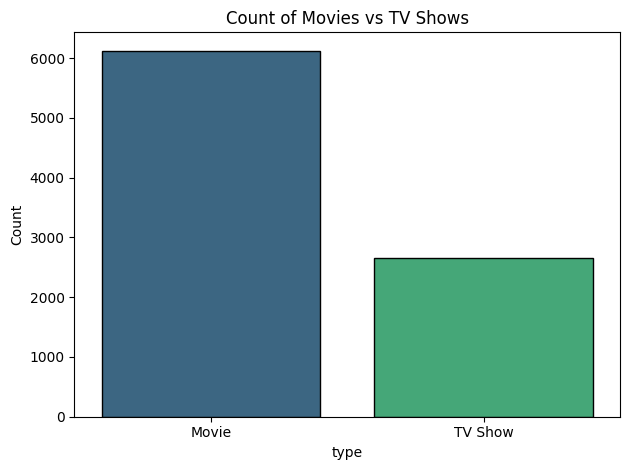

In [ ]:
# Create a plot to Count of Movies vs TV Shows

sns.countplot(data=df,x='type',hue='type',palette='viridis',edgecolor='black')

plt.title('Count of Movies vs TV Shows')
plt.xlabel('type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 7. Top 10 Countries With the Most Content on Netflix

To identify which countries contribute the most content to Netflix, we extract individual countries from multi-country entries, clean the data, and visualize the results.

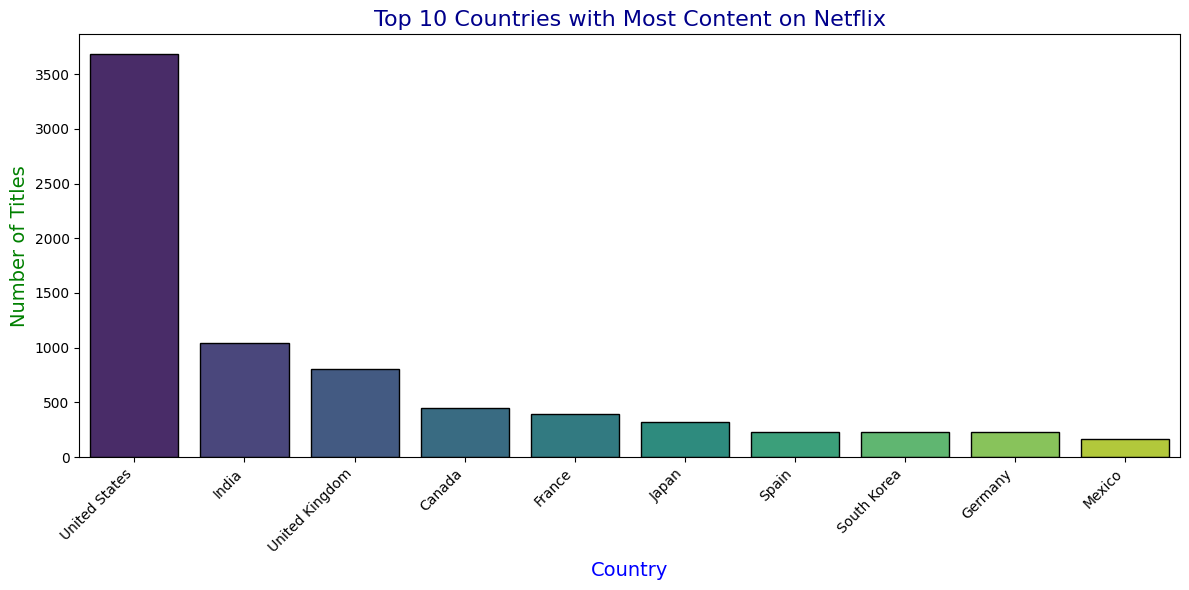

In [ ]:
# Explode the country_list to get individual countries
df_exploded = df.explode('country_list')

# Filter out 'unknown' countries
df_filtered_country = df_exploded[df_exploded['country_list'] != 'unknown']

# Count the occurrences of each country and get the top 10
top_10_countries = df_filtered_country['country_list'].value_counts().head(10)

# Plotting the top 10 countries with most content
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_countries.index,y=top_10_countries.values,palette='viridis',hue=top_10_countries.index,edgecolor='black')
plt.title('Top 10 Countries with Most Content on Netflix',fontsize=16,color='darkblue')
plt.xlabel('Country',fontsize=14,color='blue')
plt.ylabel('Number of Titles',fontsize=14,color='green')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

# 8. Yearly Growth of Netflix Content

To analyze how Netflix content has grown over the years, we extract the year from the date_added column and visualize the yearly trend.

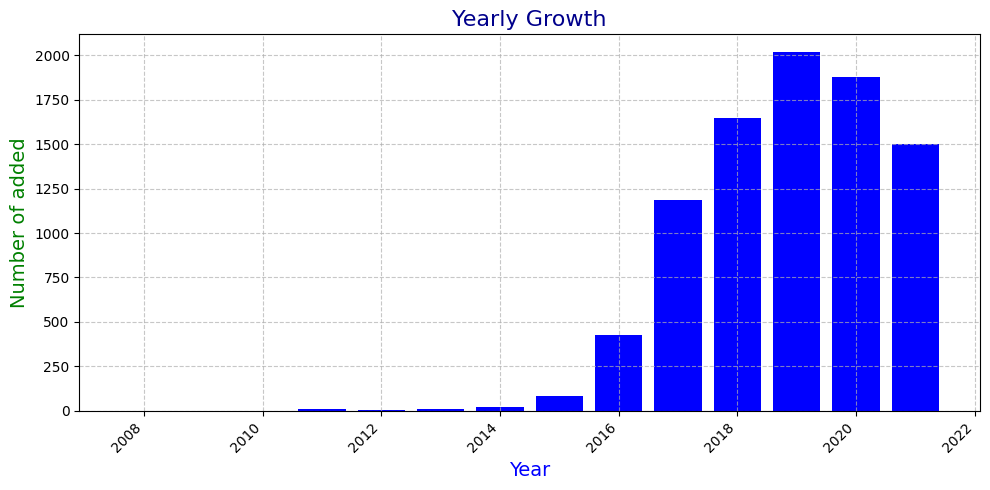

In [ ]:
from matplotlib import lines

# Filter out years from date_added
df['year_added'] = df['date_added'].dt.year

# Calculate yearly growth
yearly_growth = df['year_added'].value_counts().sort_index()

# Plotting for Shows Netflix growth timeline
plt.figure(figsize=(10,5))
plt.bar(yearly_growth.index, yearly_growth.values, color='blue')
plt.title('Yearly Growth',fontsize=16,color='darkblue')
plt.xlabel('Year',fontsize=14,color='blue')
plt.ylabel('Number of added',fontsize=14,color='green')
plt.xticks(rotation=45,ha='right')
plt.grid(True,linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

# 10. Netflix Content Released Per Year (2010–2020)

 To understand trends in content production, we analyze the number of titles released each year, focusing on 2010 to 2020.

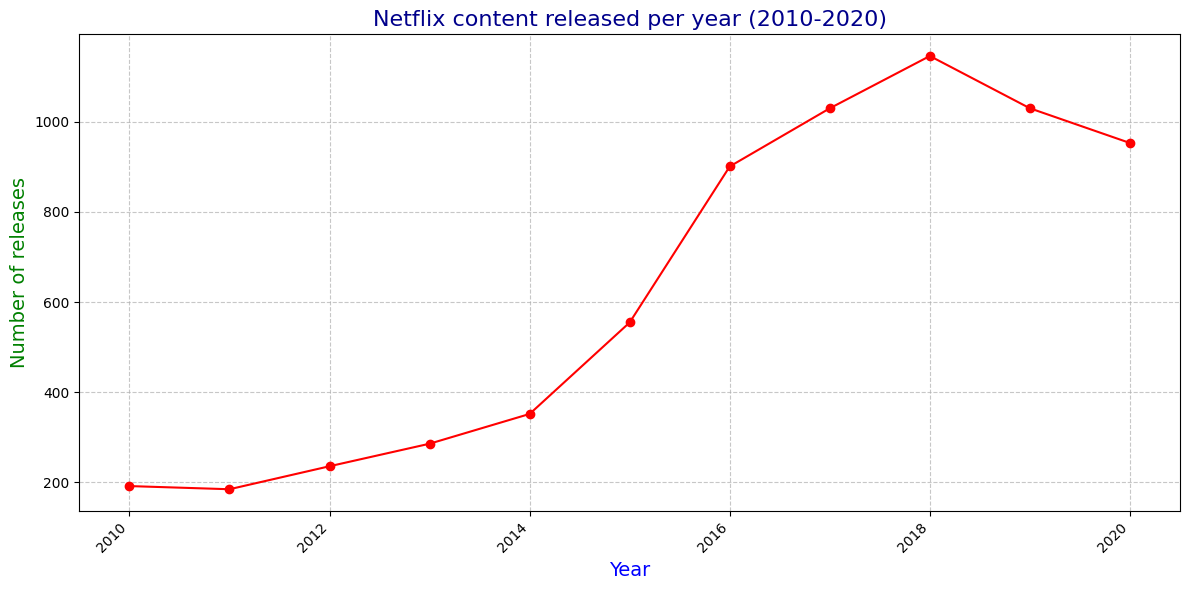

In [ ]:
# Calculate counts for each release year
release_year_counts = df['release_year'].value_counts().sort_index()

# Filter for years between 2010 and 2020
filtered_release_year_counts = release_year_counts[(release_year_counts.index >= 2010) & (release_year_counts.index <= 2020)]

# Plotting for which years are dominant for released content
plt.figure(figsize=(12,6))
plt.plot(filtered_release_year_counts.index, filtered_release_year_counts.values, color='red',marker='o')
plt.title('Netflix content released per year (2010-2020)',fontsize=16,color='darkblue')
plt.xlabel('Year',fontsize=14,color='blue')
plt.ylabel('Number of releases',fontsize=14,color='green')
plt.xticks(rotation=45,ha='right')
plt.grid(True,linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

#11. Age Groups Targeted by Netflix

To understand the demographic focus of Netflix content, we analyze the distribution of age ratings.

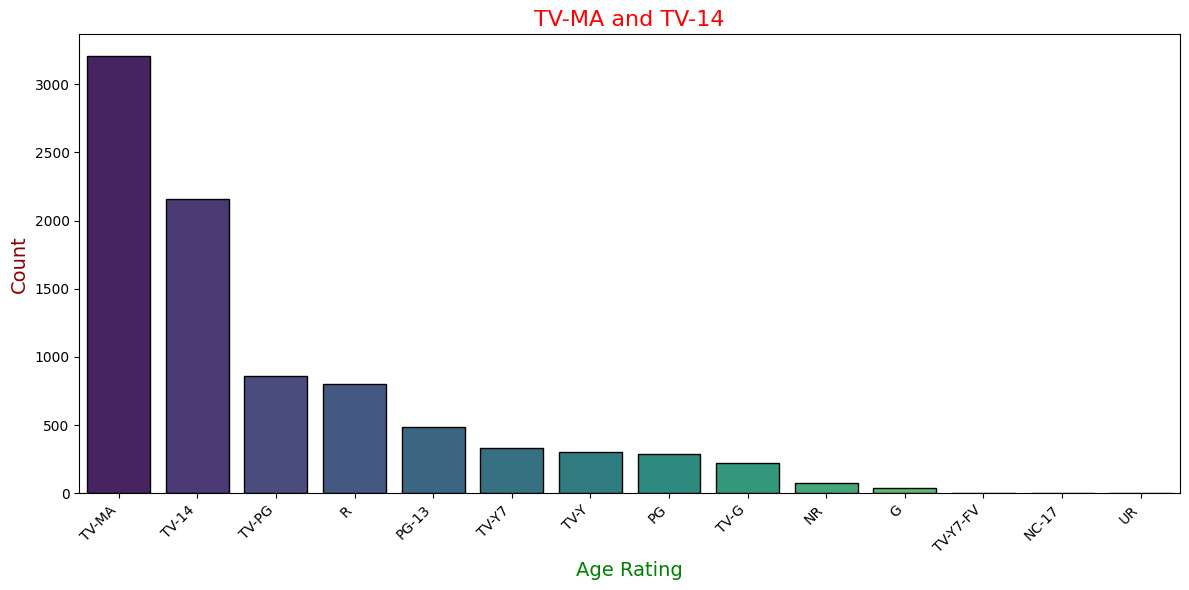

In [ ]:
# Plotting for Shows which age groups Netflix targets.
plt.figure(figsize=(12,6))
sns.barplot(x=df['rating'].value_counts().index, y=df['rating'].value_counts().values, palette='viridis',edgecolor='black', hue=df['rating'].value_counts().index, legend=False)
plt.title('TV-MA and TV-14',fontsize=16,color='red')
plt.xlabel('Age Rating',fontsize=14,color='green')
plt.ylabel('Count',fontsize=14,color='darkred')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

# 12. Typical Length of Netflix Movies

To understand the viewing time commitment for Netflix movies, we analyze the distribution of movie durations.

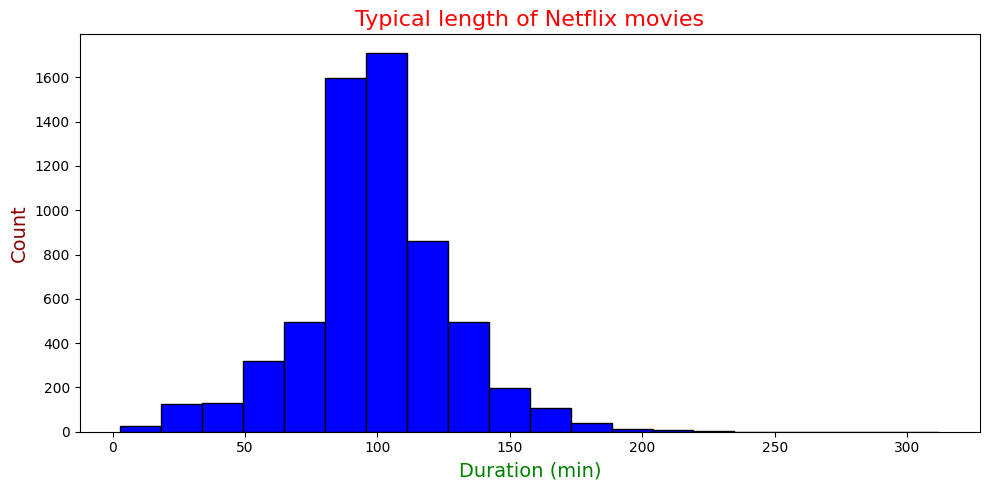

In [ ]:
# Plotting for Shows the typical length of Netflix movies

plt.figure(figsize=(10,5))
plt.hist(df['duration_min'],bins=20,color='blue',edgecolor='black')
plt.title('Typical length of Netflix movies',fontsize=16,color='red')
plt.xlabel('Duration (min)',fontsize=14,color='green')
plt.ylabel('Count',fontsize=14,color='darkred')
plt.tight_layout()
plt.show()

# 13. Typical Series Length on Netflix

To understand TV show content length, we analyze the distribution of number of seasons for Netflix series.

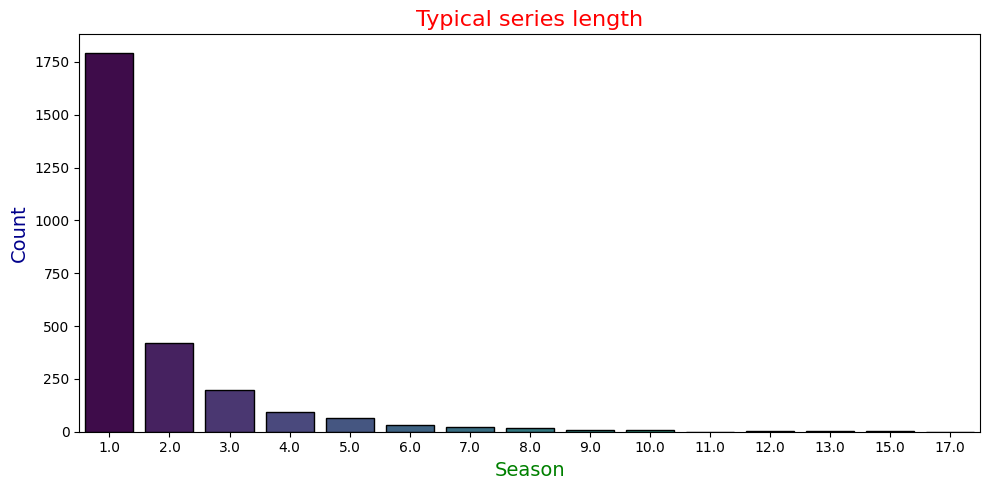

In [ ]:
# Plotting for Shows typical series length

plt.figure(figsize=(10,5))
sns.barplot(x=df['season'].value_counts().index, y=df['season'].value_counts().values, palette='viridis',edgecolor='black', hue=df['season'].value_counts().index,legend=False)
plt.title('Typical series length',fontsize=16,color='red')
plt.xlabel('Season',fontsize=14,color='green')
plt.ylabel('Count',fontsize=14,color='darkblue')
plt.tight_layout()
plt.show()

# 14. Most Commonly Published Filmmakers on Netflix

To understand which filmmakers frequently contribute to Netflix content, we analyze the top 10 directors with the most titles.

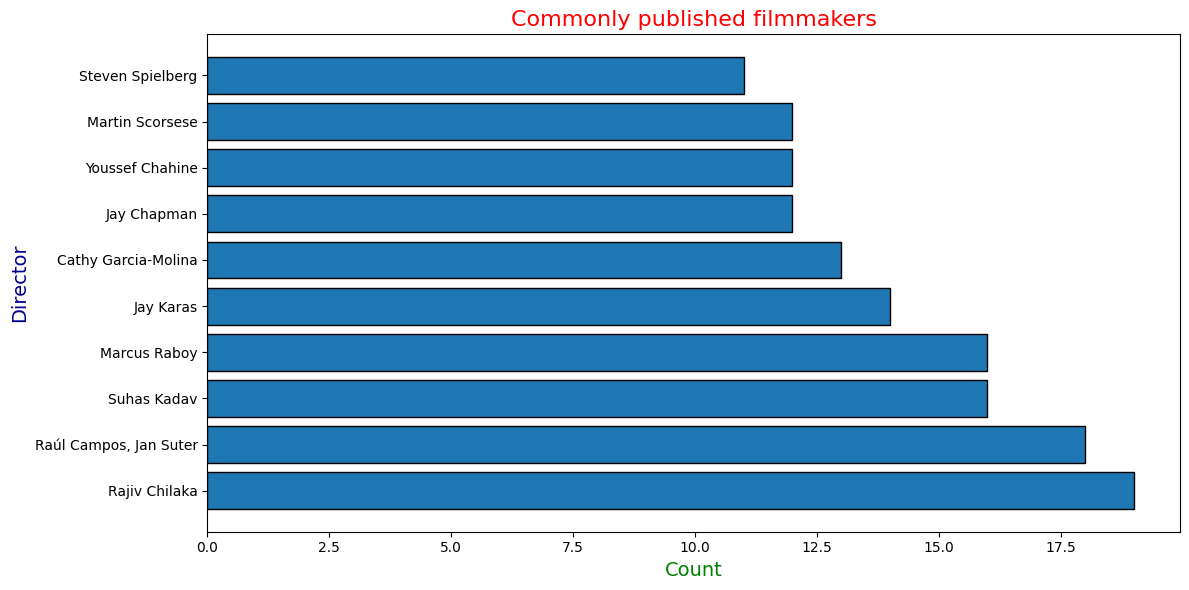

In [ ]:
# Horizontal bar chart Shows commonly published filmmakers

plt.figure(figsize=(12,6))
plt.barh(df['director'].value_counts().head(10).index, df['director'].value_counts().head(10).values, edgecolor='black')
plt.title('Commonly published filmmakers',fontsize=16,color='red')
plt.xlabel('Count',fontsize=14,color='green')
plt.ylabel('Director',fontsize=14,color='darkblue')
plt.tight_layout()
plt.show()

#15. Recurring Talent on Netflix

To identify actors and actresses who appear frequently on Netflix, we analyze the top recurring cast members.

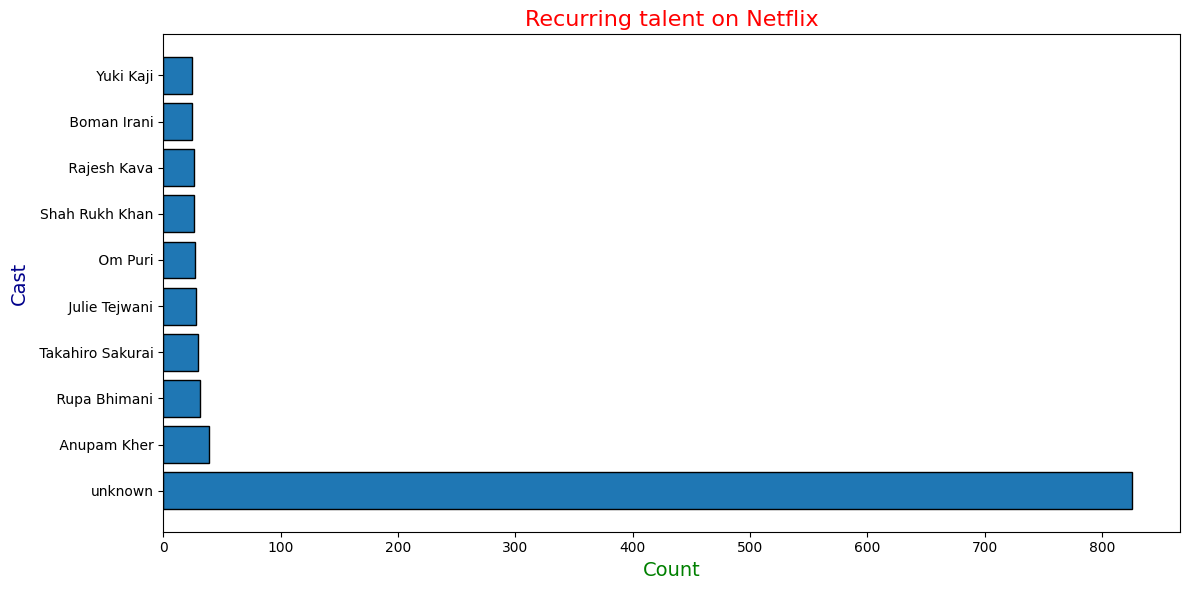

In [ ]:
# Horizontal bar chart Identifies recurring talent on Netflix

plt.figure(figsize=(12,6))
cast_s = df['cast'].str.split(',').explode()
top_cast = cast_s.value_counts().head(20)
plt.barh(top_cast.head(10).index, top_cast.head(10).values, edgecolor='black')
plt.title('Recurring talent on Netflix',fontsize=16,color='red')
plt.xlabel('Count',fontsize=14,color='green')
plt.ylabel('Cast',fontsize=14,color='darkblue')
plt.tight_layout()
plt.show()

In [ ]:
!pip install wordcloud


#16. Word Cloud of Netflix Content Descriptions

To visualize the most common keywords in Netflix titles, we create a word cloud from the description column.

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


In [ ]:
text = " ".join(desc for desc in df['description'].astype(str))


In [ ]:
# Extra stopwords to remove common useless words
stopwords = set(STOPWORDS)
stopwords.update(["film", "series", "story", "young", "man", "woman"])  # optional

wordcloud = WordCloud(
    background_color="white",
    max_words=200,
    stopwords=stopwords,
    width=1200,
    height=600
).generate(text)


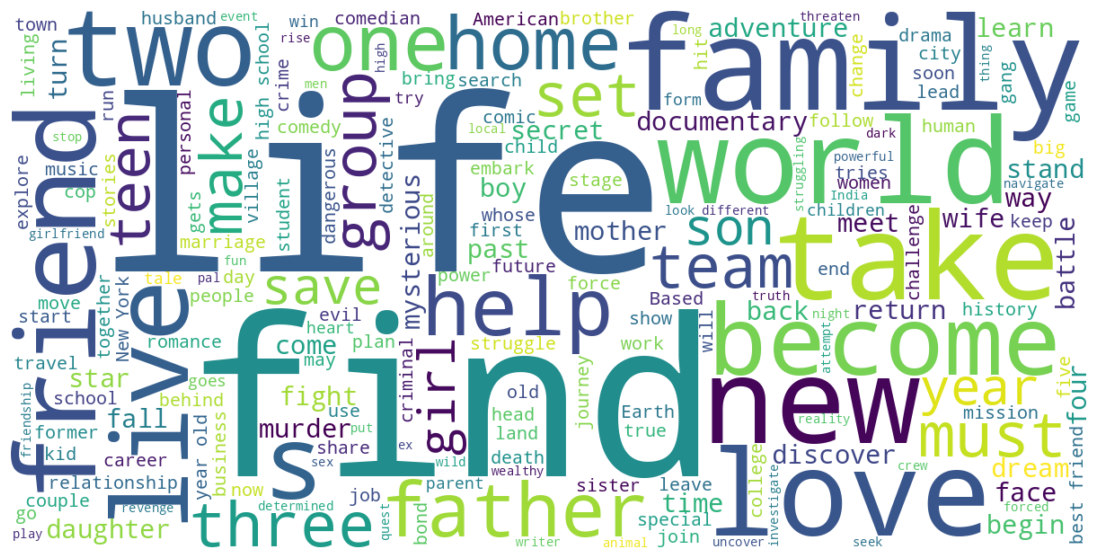

In [ ]:
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# 🏁 Final Conclusion

### 1. Movies dominate Netflix’s library.
### 2. USA and India are top content producers.
### 3. Netflix grew rapidly 2015–2019.
### 4. TV-MA is the most common rating.
### 5. Genre diversity is high.

# 💼 Business Recommendations
- Increase regional content (India, Korea, Japan).
- Invest in Crime, Thriller, Drama.
- Produce more family content.
- Competitive pricing in Asian markets.
